In [196]:
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
from ast import literal_eval
import random
import copy
import numpy as np

In [8]:
IMG_DIR = "public_dataset/reference_images_part1"
ref1_merged = pd.read_csv('ref1_merged.csv')

In [14]:
!pwd

/Users/piotr/Documents/github/knumxgolem


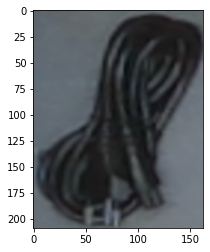

In [30]:
# ref_cp = ref1_merged.copy(deep=True)
data = {'crop_file_name':[]}
for idx in range(len(ref1_merged)):
    file_name = f'cropped_{idx}.png'
    data['crop_file_name'].append(file_name)

    img_row = ref1_merged.iloc[idx]
    img_path = os.path.join(IMG_DIR, img_row["file_name"])
    img = cv.imread(img_path)
    # plt.imshow(img);
    bbox = literal_eval(img_row['bbox'])
    x1 = bbox[0]
    y1 = bbox[1]
    width = bbox[2]
    height = bbox[3]

    x2 = int(x1 + width)
    y2 = int(y1 + height)
    cropped_image = img[y1:y2, x1:x2]
    cv.imwrite(f'cropped_ref/{file_name}', cropped_image)
    plt.imshow(cropped_image);


    

In [35]:
crop_df = pd.DataFrame(data=data)
crop_df

,crop_file_name
0,cropped_0.png
1,cropped_1.png
2,cropped_2.png
3,cropped_3.png
4,cropped_4.png
...,...
139,cropped_139.png
140,cropped_140.png
141,cropped_141.png
142,cropped_142.png


In [34]:
ref1_merged

,image_id,bbox,category_id,width,height,file_name,category_name
0,4,"[665, 448, 206, 174]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine
1,4,"[475, 186, 236, 186]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine
2,4,"[962, 76, 229, 217]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine
3,4,"[778, 250, 163, 135]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine
4,4,"[184, 377, 244, 194]",8,1280,720,nomagic_mulled_wine_3.png,nomagic_mulled_wine
...,...,...,...,...,...,...,...
139,67,"[388, 443, 238, 186]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables
140,67,"[791, 129, 277, 139]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables
141,67,"[345, 139, 271, 109]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables
142,67,"[895, 365, 177, 223]",3,1280,720,nomagic_digitec_cables_1.png,nomagic_digitec_cables


In [38]:
ref1_merged_with_crops = pd.merge(ref1_merged, crop_df,  how='inner', left_index=True, right_index=True)

ref1_merged_with_crops.to_csv(sep=',', path_or_buf='ref1_merged_with_crops.csv', index=None)

In [181]:
x = ref1_merged_with_crops.reset_index().groupby(by='category_id')['index'].apply(list).reset_index(name='category_indices')['category_indices'].to_dict()

In [207]:
len(flatten_vals)

144

In [187]:
count  = 0
triplets = []
# x = {10:[1,2,3,5],11:[1,2,3,5], 12:[1,2,3,5]}
for class_idx, indices in x.items():
    class_inds_without_current = list(x.keys()).copy()
    class_inds_without_current.remove(class_idx)
    # print(class_inds_without_current,indices)
    for idx in indices:
        inds_cp = indices.copy()
        inds_cp.remove(idx)
        # print(inds_cp)
        # if len(inds_cp)==0:
        #     print(class_idx, indices)
        #     continue
        same_class_idx = random.choice(inds_cp)
        # print(same_class_idx)
        # # print(same_class_idx)
        # # print(idx,inds_cp)
        sample_class = random.choice(class_inds_without_current)
        other_class_idx = random.choice(x[sample_class])
        triplets.append([idx, same_class_idx, other_class_idx])

# triplets
flatten_vals = [item for sublist in list(x.values()) for item in sublist]
assert len(triplets) = len(flatten_vals)

In [186]:
len(triplets)

144

In [169]:
count = 0
for class_idx, idxs in x.items():
    print(len(idxs))
    if len(idxs) ==1:
        print(idxs)
    # count += sum(len(idxs))
# count

4
4
4


In [175]:
triplets

[[1, 5, 1],
 [2, 3, 3],
 [3, 1, 2],
 [5, 3, 5],
 [1, 3, 3],
 [2, 3, 1],
 [3, 5, 3],
 [5, 1, 5],
 [1, 5, 2],
 [2, 3, 1],
 [3, 5, 5],
 [5, 2, 2]]